# Let's play with some of this NiceRide Data
We have a month's worth of data from NiceRide, specifically, data from August 2019. We'll do a bit of __exploratory data analysis__.
## EDA!!

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# import the data set
df = pd.read_csv('/Users/no50free/GitHub/NiceRide/201908-niceride-tripdata.csv')

In [2]:
# The size of the data set
df.shape

(72641, 16)

We see there are 72641 instances and 16 columns. The next cell will reveal the columns.

In [3]:
# Let's see the column headers
df.columns

Index(['tripduration', 'start_time', 'end_time', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'bike type'],
      dtype='object')

As a quick first example, let's look at the birth year of our August 2019 riders. We'll use the value_counts method to count the number of instances in the column 'birth year'.

In [4]:
df['birth year'].value_counts()

1969    18883
1989     2861
1990     2643
1991     2343
1988     2320
        ...  
1944       22
1942       21
1931       13
1943        4
1901        2
Name: birth year, Length: 65, dtype: int64

### Wow!
That's a lot of people born in 1969! Let's look at a histogram.

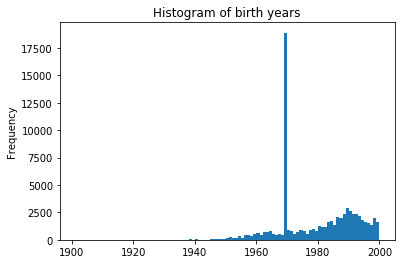

In [5]:
yearbins =range(df['birth year'].min(),df['birth year'].max())
ax = df['birth year'].plot.hist(bins=yearbins)
plt.title('Histogram of birth years')
plt.savefig('birth_years.png')

In [6]:
plt.savefig('images/birth_years.png')

<Figure size 432x288 with 0 Axes>

We now look at a trip duration histogram.

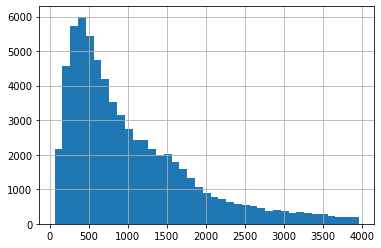

In [6]:
df['tripduration'].hist(bins=np.array(range(60,4000,100)))

We see from the above plot that the mode for `tripduration` falls in the 300-500 second range, or 50 - 80ish minutes. So an hour give or take a bit.

In [11]:
df['tripduration'].describe()

count    7.264100e+04
mean     5.995383e+03
std      7.581782e+04
min      6.100000e+01
25%      4.550000e+02
50%      8.600000e+02
75%      1.629000e+03
max      3.870305e+06
Name: tripduration, dtype: float64

(0, 5000)

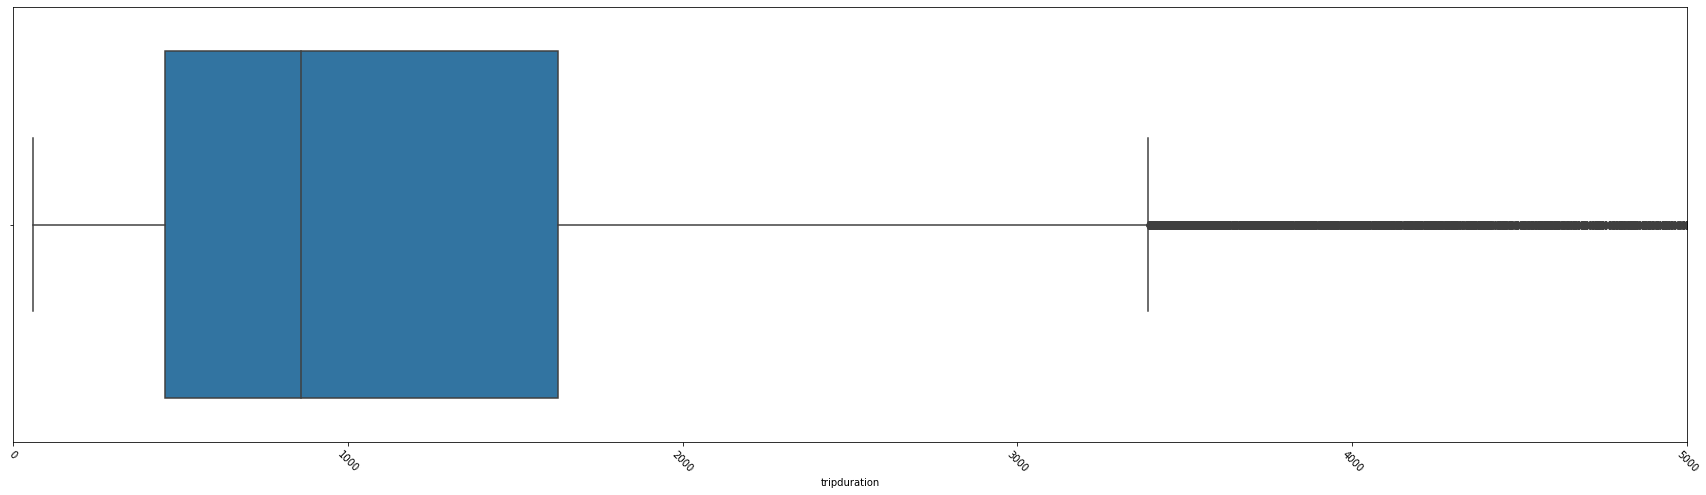

In [12]:
plt.figure(figsize=(30,8))
sns.boxplot(x='tripduration', data=df)
plt.xticks(rotation=-45)
plt.xlim(0,5000)

In [26]:
df['start station name'].value_counts()

Lake Street & Knox Ave S         1893
S 5th Street & Nicollet Mall     1236
6th Ave SE & University Ave      1192
YWCA Downtown                    1027
100 Main Street SE               1009
                                 ... 
Willard Park                       21
Elwood Ave N & Oak Park Ave N      10
North Commons Park                  8
Hall Park                           5
NRM Bike Shop 1                     2
Name: start station name, Length: 169, dtype: int64

In [16]:
df['end station name'].value_counts()

Lake Street & Knox Ave S         2010
S 5th Street & Nicollet Mall     1275
6th Ave SE & University Ave      1204
100 Main Street SE               1063
11th Ave S & S 2nd Street         956
                                 ... 
Willard Park                       20
North Commons Park                 18
Girard Ave N & W Broadway Ave      17
Elwood Ave N & Oak Park Ave N      10
Hall Park                           9
Name: end station name, Length: 169, dtype: int64

## Reformating trip duration
The trip duration column is measured in seconds. Let's change that to be measured in hours.

In [7]:
df['tripduration_hrs'] = df['tripduration']/(60*60)

Text(0.5, 0, 'trip hours')

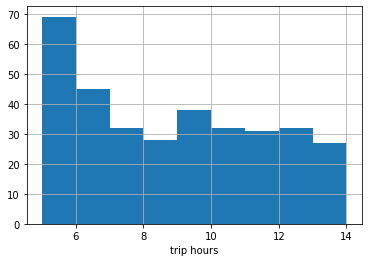

In [8]:
# histogram of long trips.
df['tripduration_hrs'].hist(bins=np.array(range(5,15,1)))
plt.xlabel('trip hours')

Looks like looking at trips under 6 hours looks like a reasonable cutoff.

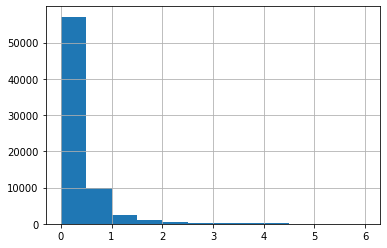

In [9]:
df['tripduration_hrs'].hist(bins=np.linspace(0,6,13))

In [10]:
sum(df['tripduration_hrs']>=6)/len(df)*100

1.2830219848295041

If we trim off trips longer than 6 hours, we lose 1.2% of our dataset.

# Long trips
Let's look at these values where the trip duration is exceedingly long. We'll restrict to situations where the trip duration is over 24 hours. This may indicate the bike was lost and recovered later, or some other situation.

In [11]:
# We'll isolate the instances where 'tripduration' is longer than a day (24*60*60). Then we count the usertypes
# who fall in this range.
df_longtrips=df.loc[df['tripduration_hrs']>24 , ['usertype']]
df_longtrips['usertype'].value_counts()

Customer      407
Subscriber     52
Name: usertype, dtype: int64

It appears that about 8 times as many customers as subscribers held a bike for longer than a day.

## Convert start and end times to datetime datatype

In [15]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

## Add days of weeks
0 = Monday,
1 = Tuesday,
2 = Wednesday,
3 = Thursday,
4 = Friday,
5 = Saturday,
6 = Sunday

In [16]:
df['startdayofweek'] = df['start_time'].dt.dayofweek
df['enddayofweek'] = df['end_time'].dt.dayofweek
df.head(3)

,tripduration,start_time,end_time,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,bike type,tripduration_hrs,startdayofweek,enddayofweek
0,811,2019-08-01 00:00:44.883,2019-08-01 00:14:16.214,191.0,Park Ave & 4th Street S,44.975907,-93.260061,198.0,5th Street NE & 3rd Ave NE,44.991914,-93.255799,262,Subscriber,1991,2,Classic,0.225278,3,3
1,99,2019-08-01 00:00:48.109,2019-08-01 00:02:27.517,43.0,Nicollet Mall & 10th Street,44.973839,-93.274544,8.0,YWCA Downtown,44.972217,-93.276435,477,Subscriber,1990,2,Classic,0.027500,3,3
2,1205,2019-08-01 00:02:34.295,2019-08-01 00:22:39.702,69.0,N Washington Ave & 9th Ave N,44.989909,-93.279788,199.0,3rd Street NE & Lowry Ave NE,45.013040,-93.264573,24,Customer,1994,1,Classic,0.334722,3,3


In [17]:
dictday={0 : 'Monday', 1 : 'Tuesday',2 : 'Wednesday', 3 : 'Thursday',4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
for j in range(0,len(df)):
    df.loc[j,'startday'] = dictday[df.loc[j,'startdayofweek']]

#df.rename(columns={'dayofweek':'startdayofweek'},inplace=True)
df.head()

,tripduration,start_time,end_time,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,bike type,tripduration_hrs,startdayofweek,enddayofweek,startday
0,811,2019-08-01 00:00:44.883,2019-08-01 00:14:16.214,191.0,Park Ave & 4th Street S,44.975907,-93.260061,198.0,5th Street NE & 3rd Ave NE,44.991914,-93.255799,262,Subscriber,1991,2,Classic,0.225278,3,3,Thursday
1,99,2019-08-01 00:00:48.109,2019-08-01 00:02:27.517,43.0,Nicollet Mall & 10th Street,44.973839,-93.274544,8.0,YWCA Downtown,44.972217,-93.276435,477,Subscriber,1990,2,Classic,0.027500,3,3,Thursday
2,1205,2019-08-01 00:02:34.295,2019-08-01 00:22:39.702,69.0,N Washington Ave & 9th Ave N,44.989909,-93.279788,199.0,3rd Street NE & Lowry Ave NE,45.013040,-93.264573,24,Customer,1994,1,Classic,0.334722,3,3,Thursday
3,890,2019-08-01 00:02:40.754,2019-08-01 00:17:31.156,8.0,YWCA Downtown,44.972217,-93.276435,67.0,Glenwood Ave & N Morgan Ave,44.981147,-93.304427,181,Subscriber,1990,2,Classic,0.247222,3,3,Thursday
4,1179,2019-08-01 00:03:19.343,2019-08-01 00:22:59.162,69.0,N Washington Ave & 9th Ave N,44.989909,-93.279788,199.0,3rd Street NE & Lowry Ave NE,45.013040,-93.264573,1310,Customer,1969,0,Classic,0.327500,3,3,Thursday


In [18]:
for j in range(0,len(df)):
    df.loc[j,'endday'] = dictday[df.loc[j,'enddayofweek']]
    
df.head(3)

,tripduration,start_time,end_time,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,bikeid,usertype,birth year,gender,bike type,tripduration_hrs,startdayofweek,enddayofweek,startday,endday
0,811,2019-08-01 00:00:44.883,2019-08-01 00:14:16.214,191.0,Park Ave & 4th Street S,44.975907,-93.260061,198.0,5th Street NE & 3rd Ave NE,44.991914,...,262,Subscriber,1991,2,Classic,0.225278,3,3,Thursday,Thursday
1,99,2019-08-01 00:00:48.109,2019-08-01 00:02:27.517,43.0,Nicollet Mall & 10th Street,44.973839,-93.274544,8.0,YWCA Downtown,44.972217,...,477,Subscriber,1990,2,Classic,0.027500,3,3,Thursday,Thursday
2,1205,2019-08-01 00:02:34.295,2019-08-01 00:22:39.702,69.0,N Washington Ave & 9th Ave N,44.989909,-93.279788,199.0,3rd Street NE & Lowry Ave NE,45.013040,...,24,Customer,1994,1,Classic,0.334722,3,3,Thursday,Thursday


In [ ]:
sns.catplot(x='startday', y='tripduration_hrs', hue='usertype', data=df, kind='swarm')
plt.ylim(0,3)
plt.xticks(rotation=-45)

In [23]:
df['tripduration_hrs']

0        0.225278
1        0.027500
2        0.334722
3        0.247222
4        0.327500
           ...   
72636    0.107222
72637    0.206944
72638    0.534167
72639    0.133333
72640    0.120833
Name: tripduration_hrs, Length: 72641, dtype: float64